# Importing Libraries

In [3]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Reading the Data

In [4]:
df_customer = pd.read_csv('/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Data_Mining/Projeto/Data-Mining/DM_AIAI_CustomerDB (1).csv', sep = ',')

# Metadata

**Variables**
- `Loyalty#`: Unique customer identifier for loyalty program members;
- `First Name`:Customer's first name;
- `Last Name`: Customer's last name;
- `Customer Name`:Customer's full name (concatenated);
- `Country`: Customer's country of residence;
- `Province or State`: Customer's province or state;
- `City`: Customer's city of residence;
- `Latitude`: Geographic latitude coordinate of customer location;
- `Longitude`: Geographic longitude coordinate of customer location;
- `Postal code`: Customer's postal/ZIP code;
- `Gender`: Customer's gender;
- `Education`: Customer's highest education level (Bachelor, College, etc.);
- `Location Code`: Urban/Suburban/Rural classification of customer residence;
- `Income`: Customer's annual income;
- `Marital Status`;Customer's marital status (Married, Single, Divorced);
- `LoyaltyStatus`: Current tier status in loyalty program (Star > Nova > Aurora);
- `EnrollmentDateOpening`: Date when customer joined the loyalty program;
- `CancellationDate`: Date when customer left the program;
- `Customer Lifetime Value`: Total calculated monetary value of customer relationship;
- `EnrollmentType`: Method of joining loyalty program;

In [5]:
df_customer.head() #First 5 rows of the dataframe

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [6]:
df_customer.tail()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,15,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,...,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,16,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,...,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,17,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,...,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,19,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,...,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


# Initial Analysis

In [7]:
# Checking shape of dataframe
df_customer.shape

(16921, 21)

In [8]:
# Checking the info of the dataframe
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [9]:
df_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16921.0,8440.023639,4884.775439,0.000000,4210.000000,8440.000000,12670.000000,16900.000000
Loyalty#,16921.0,550197.393771,259251.503597,100011.000000,326823.000000,550896.000000,772438.000000,999999.000000
Latitude,16921.0,47.174500,3.307971,42.984924,44.231171,46.087818,49.282730,60.721188
Longitude,16921.0,-91.814768,22.242429,-135.056840,-120.237660,-79.383186,-74.596184,-52.712578
Income,16901.0,37758.038400,30368.992499,0.000000,0.000000,34161.000000,62396.000000,99981.000000
Customer Lifetime Value,16901.0,7990.460188,6863.173093,1898.010000,3979.720000,5780.180000,8945.690000,83325.380000


In [10]:
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [11]:
# replace "" by nans
df_customer.replace("", np.nan, inplace=True)

# count of missing values
df_customer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [12]:
df_customer.describe(include='all').T
df_customer[df_customer['Customer Lifetime Value'].isna()]
#df_customer['Loyalty#'].nunique()
# loyalty number should be unique for each customer
# checking duplicates in loyalty number
#df_customer[df_customer['Loyalty#']==354438]
df_customer.duplicated().sum()

np.int64(0)

# Categorical Variables' Absolute Frequencies

In [13]:
# Creating a list with the names of the non metric features
non_metric_features = ['First Name', 'Last Name', 'Customer Name', 'Country', 'Province or State', 'City','Gender', 'Education','Location Code', 'Marital Status','LoyaltyStatus','EnrollmentType']
for i in non_metric_features:
    # using the unique() method to see unique values in each non metric feature
    print(df_customer[i].unique())

['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
['Canada']
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
['female' 'male']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Urban' 'Rural' 'Suburban']
['Married' 'Divorced' 'Single']
['Star' 'Aurora' 'Nova']
['Standard' '2021 Promotion']


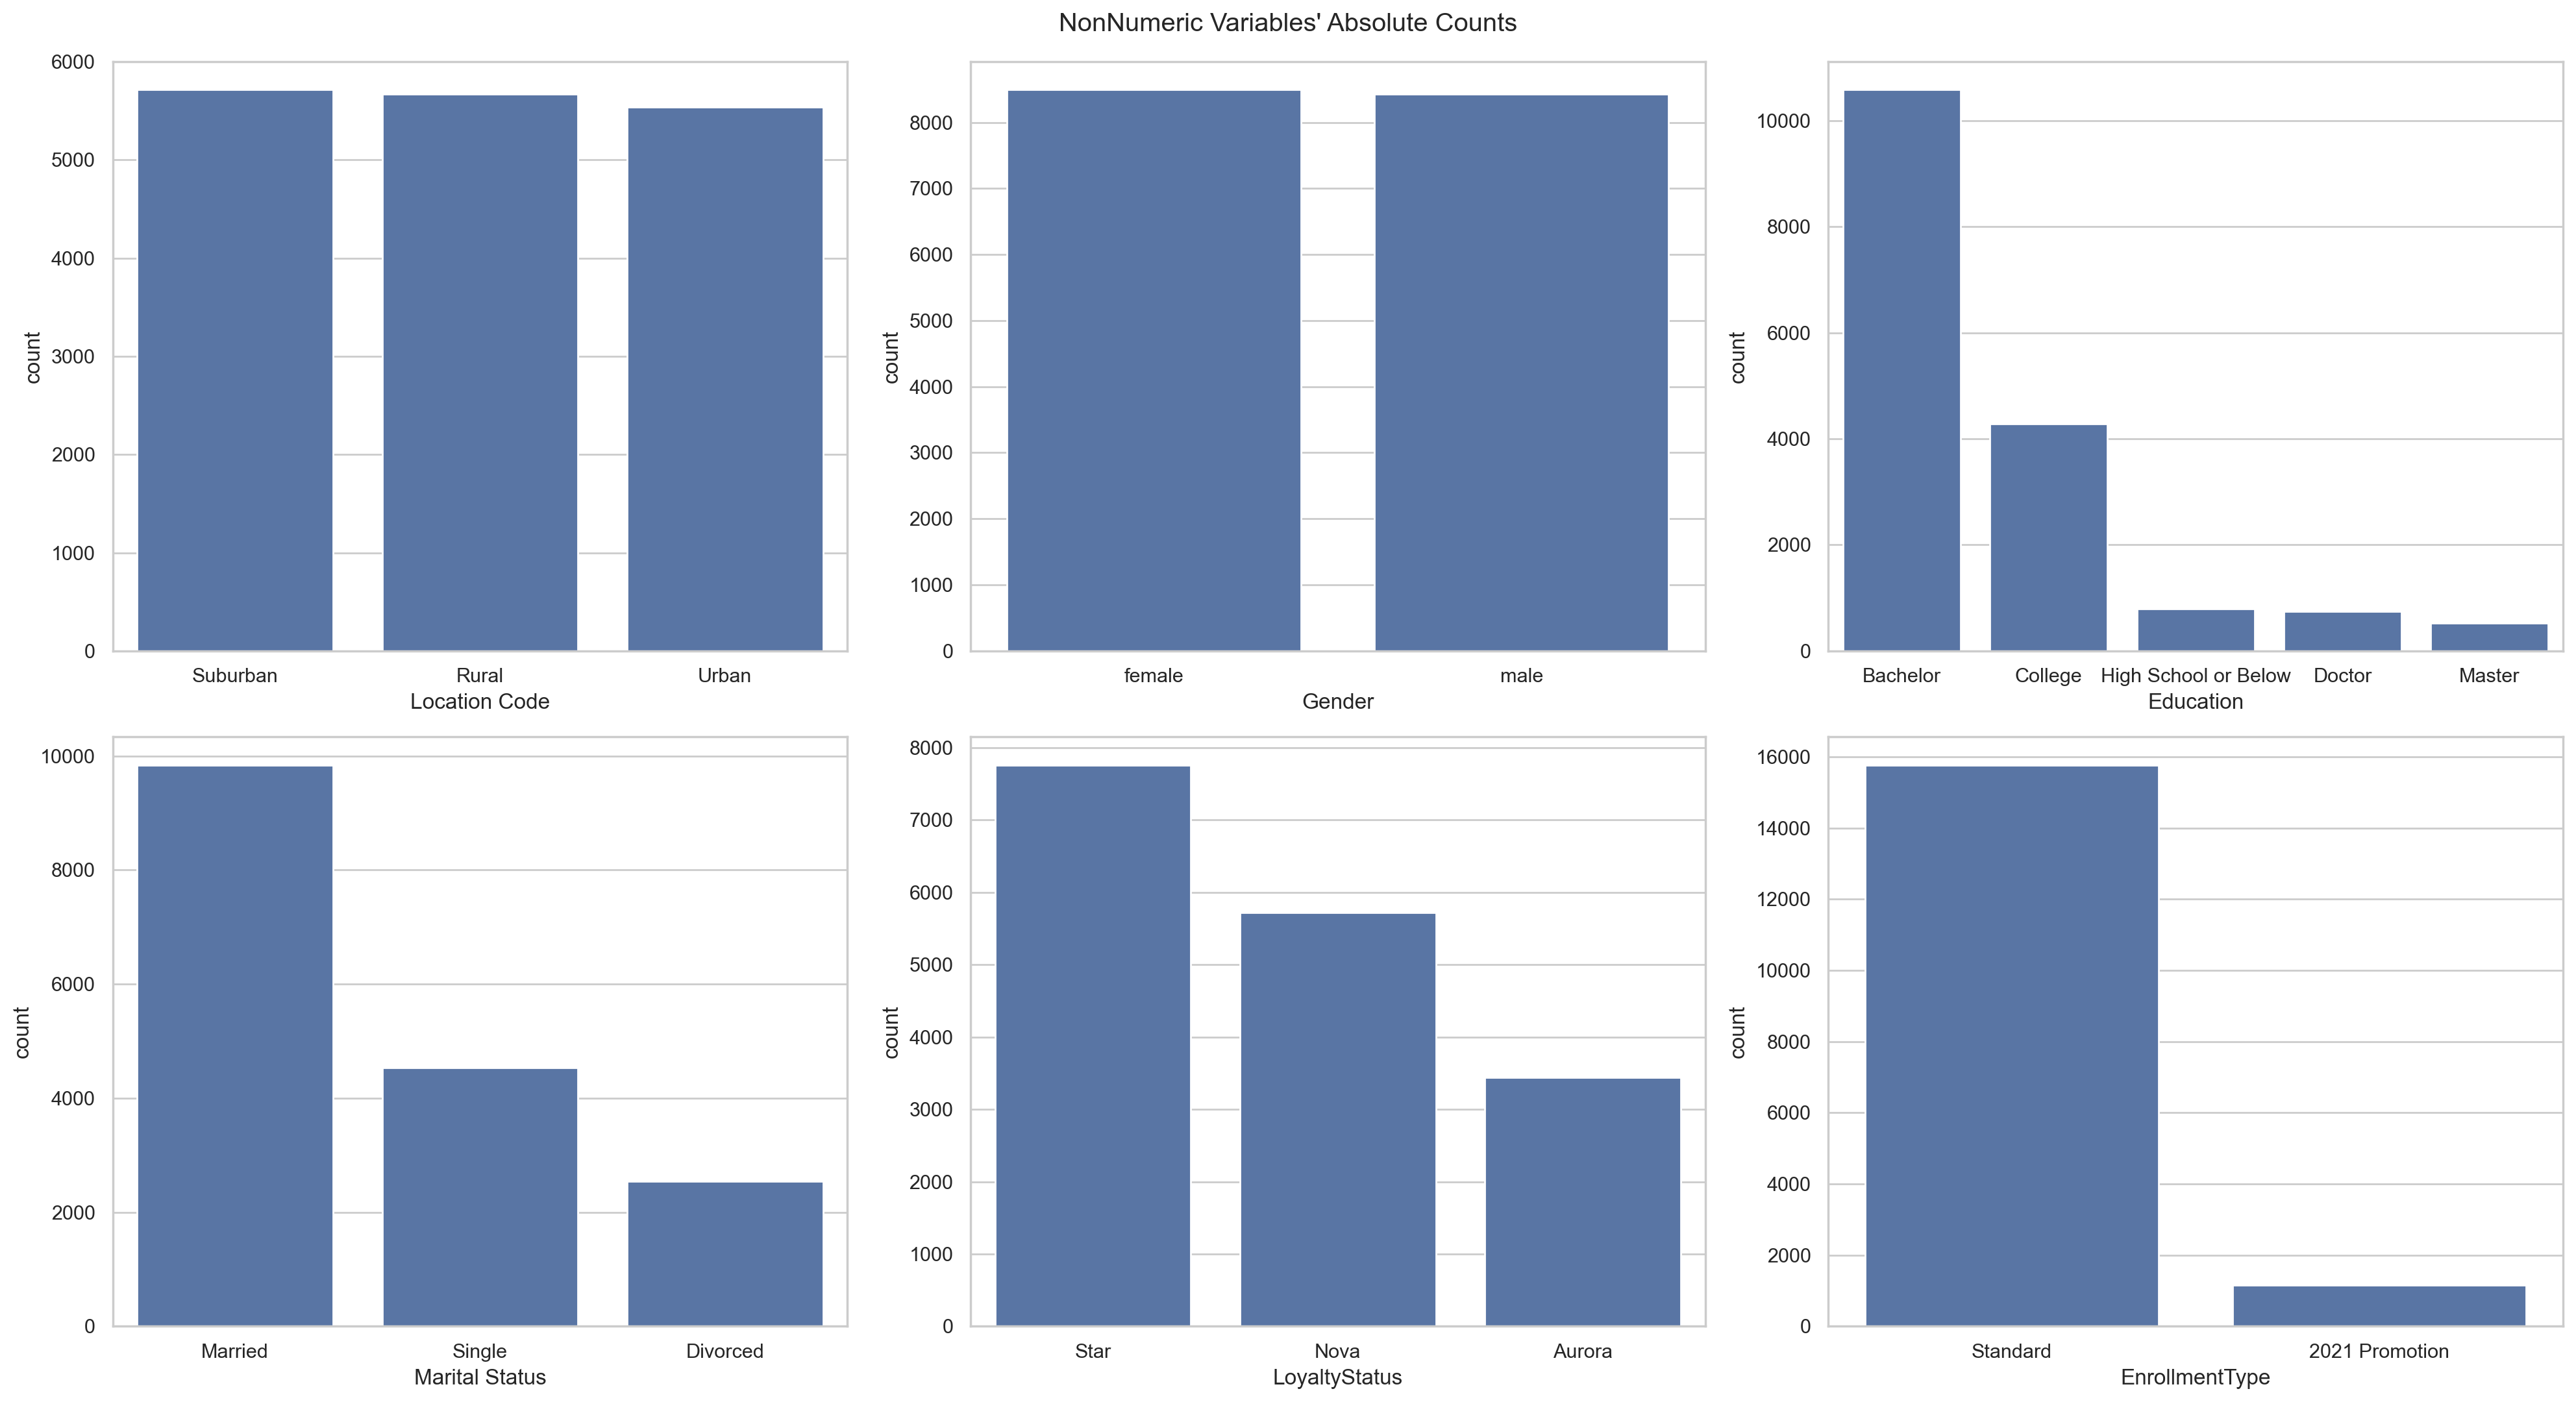

In [14]:
#Plot ALL Non Numeric Variables' Absolute Counts in one figure
non_metric_features = ['Location Code','Gender', 'Education', 'Marital Status','LoyaltyStatus','EnrollmentType']
sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")



## What do these do?
sp_rows = 2
sp_cols = ceil(len(non_metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df_customer[feat],order=df_customer[feat].value_counts().index,ax=ax)
# Layout
# Add a centered title to the figure:
title = "NonNumeric Variables' Absolute Counts"

plt.suptitle(title)


plt.show()

## Bivariate Categorical Distribution

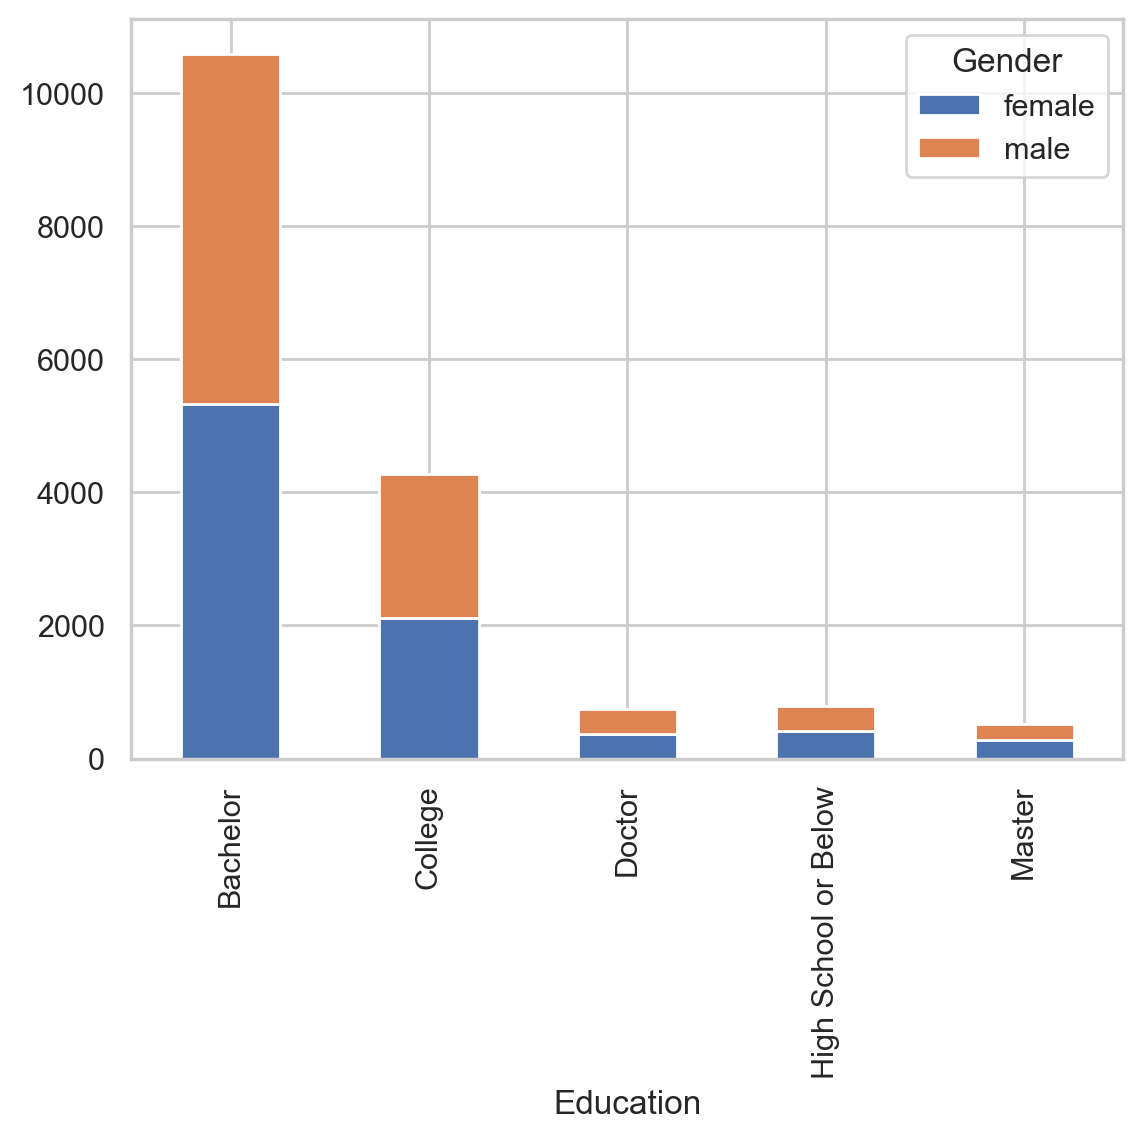

In [15]:
cat1 = 'Gender'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

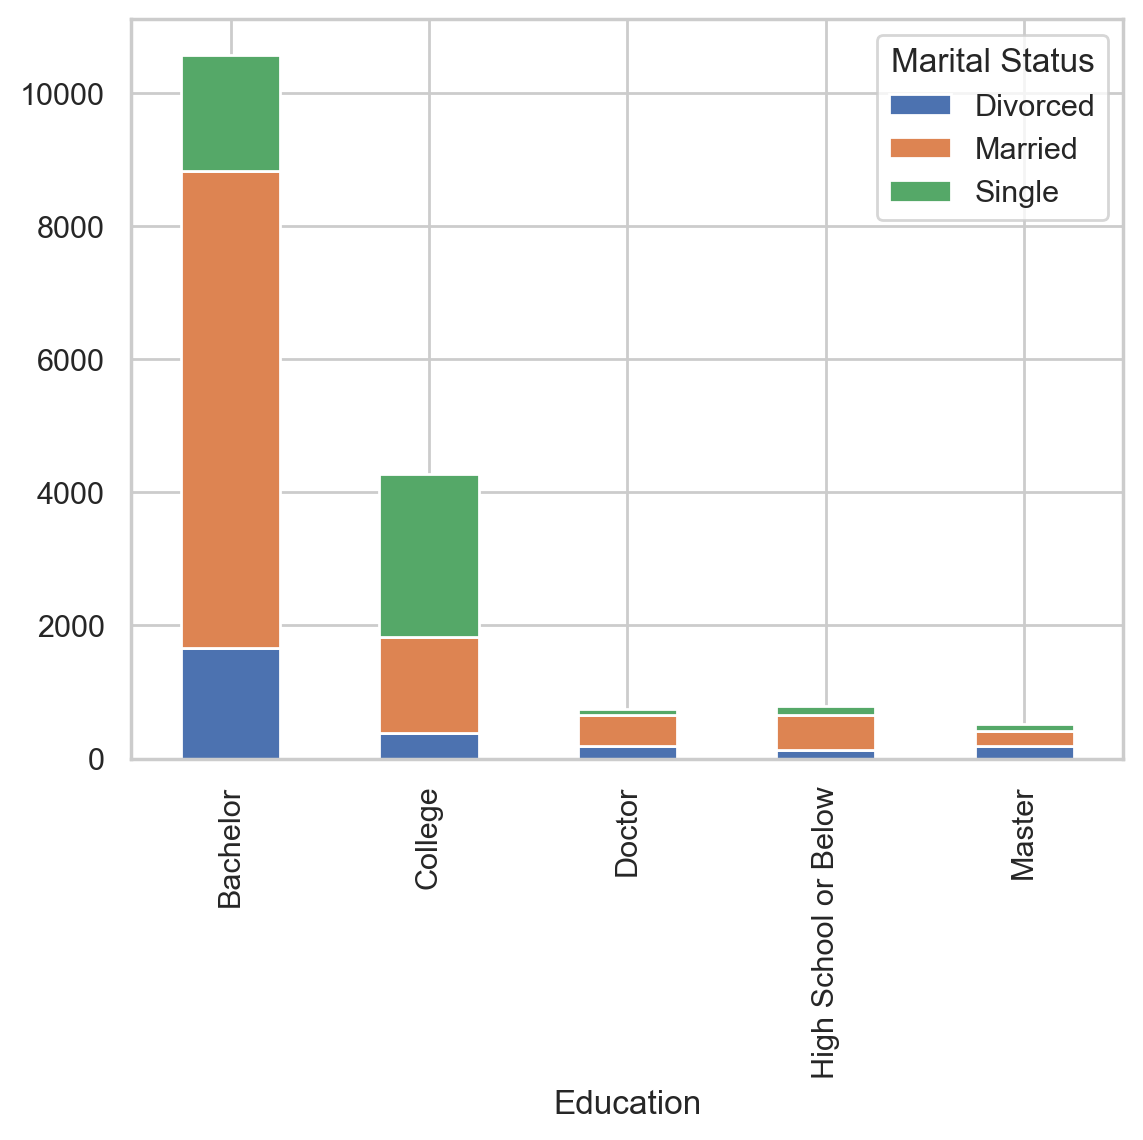

In [16]:
cat1 = 'Marital Status'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

<Axes: xlabel='Gender'>

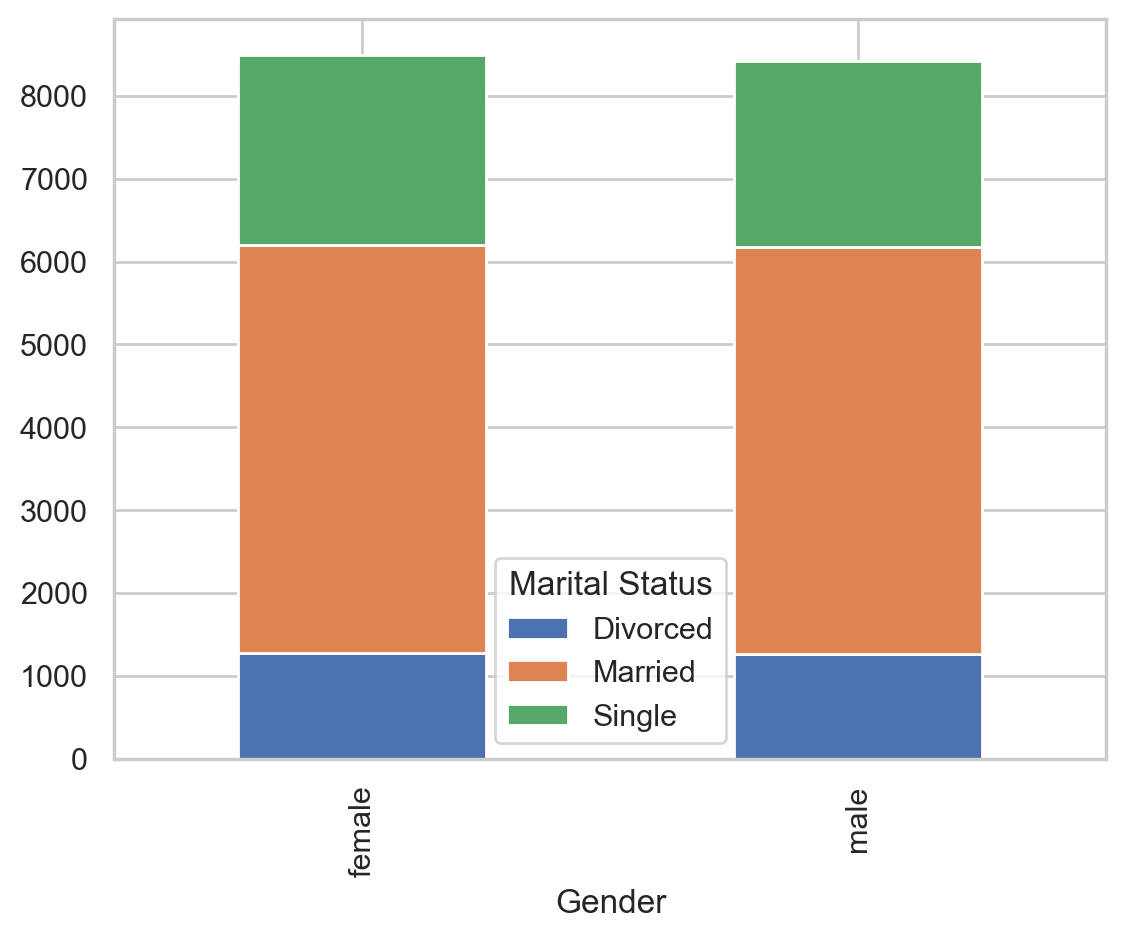

In [17]:
cat1 = 'Marital Status'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Gender'>

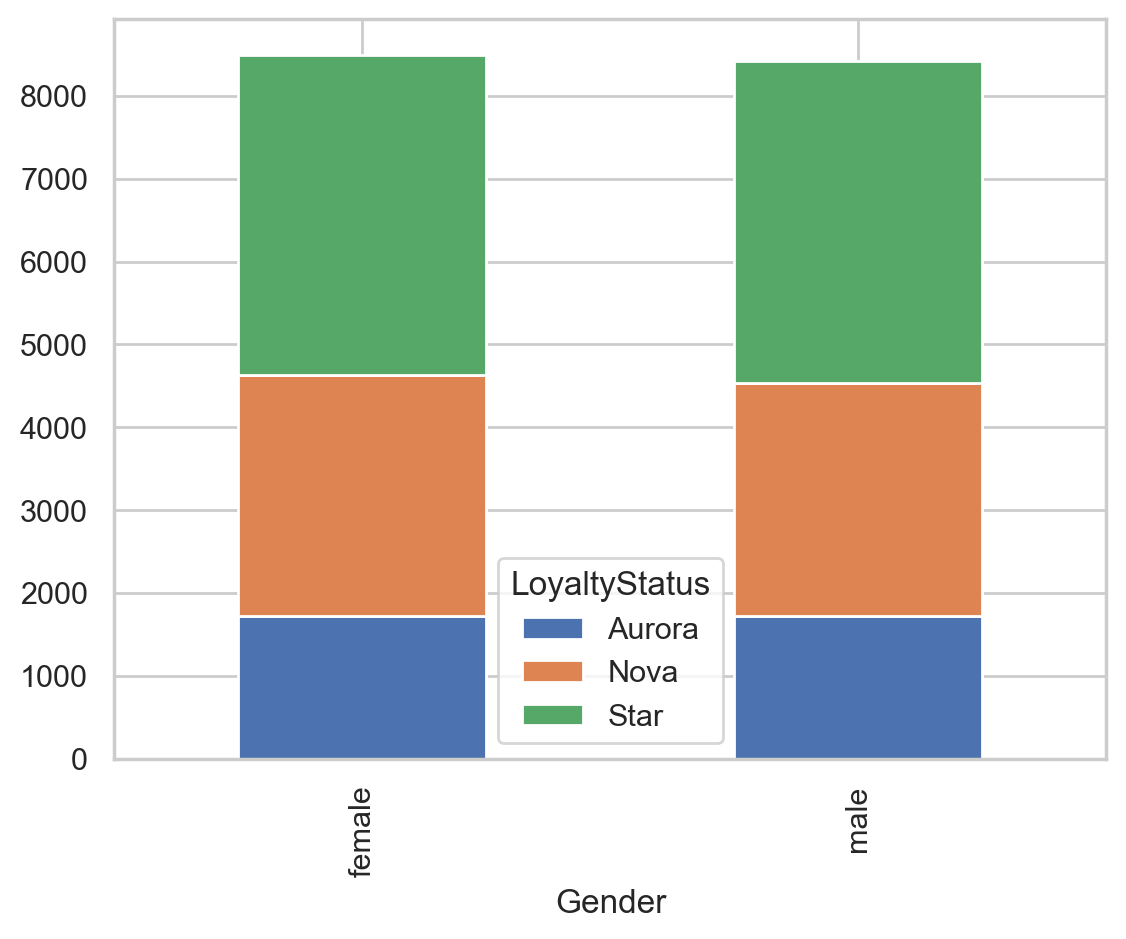

In [18]:
cat1 = 'LoyaltyStatus'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)


<Axes: xlabel='Education'>

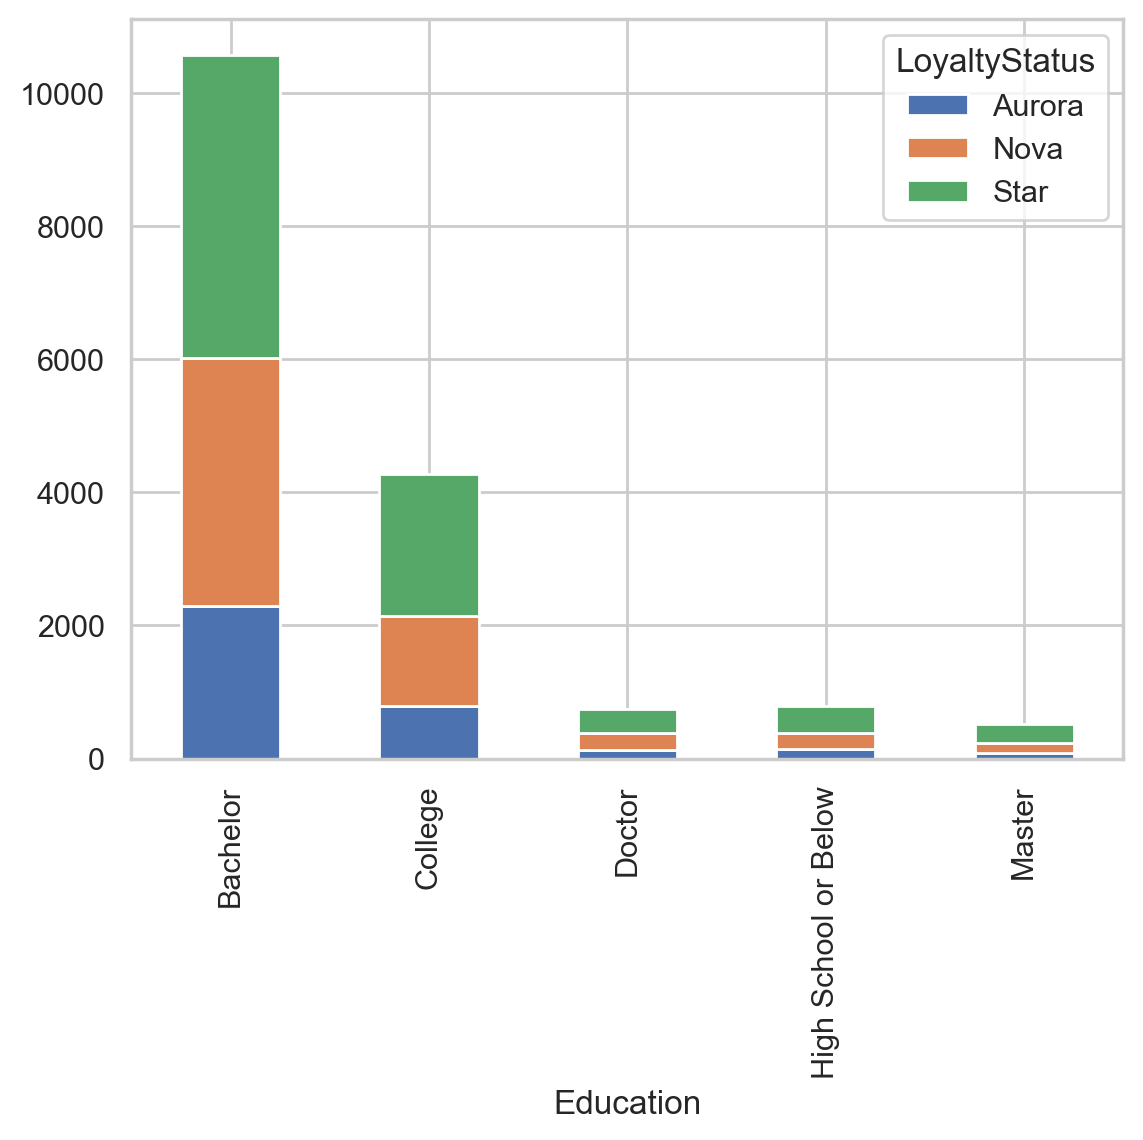

In [19]:
cat1 = 'LoyaltyStatus'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Marital Status'>

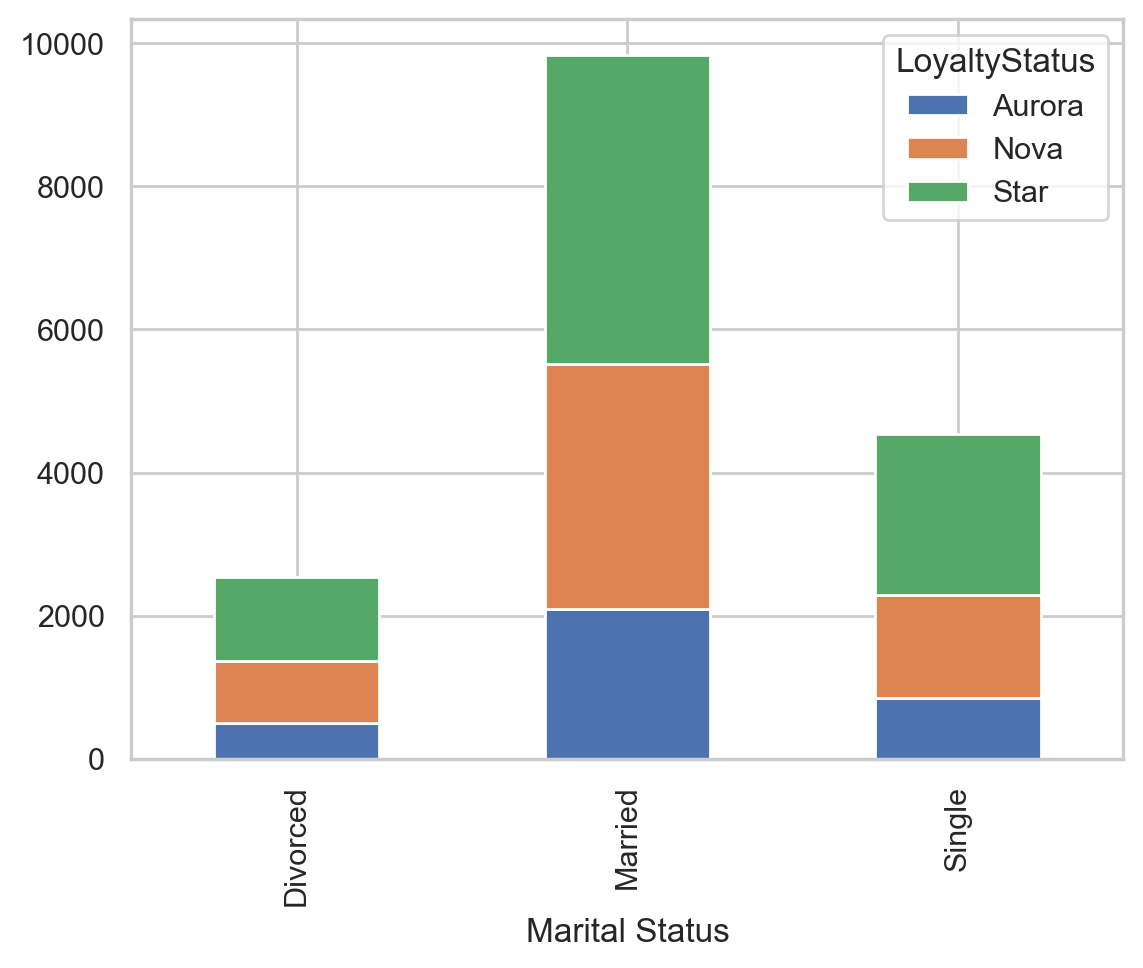

In [20]:
cat1 = 'LoyaltyStatus'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Gender'>

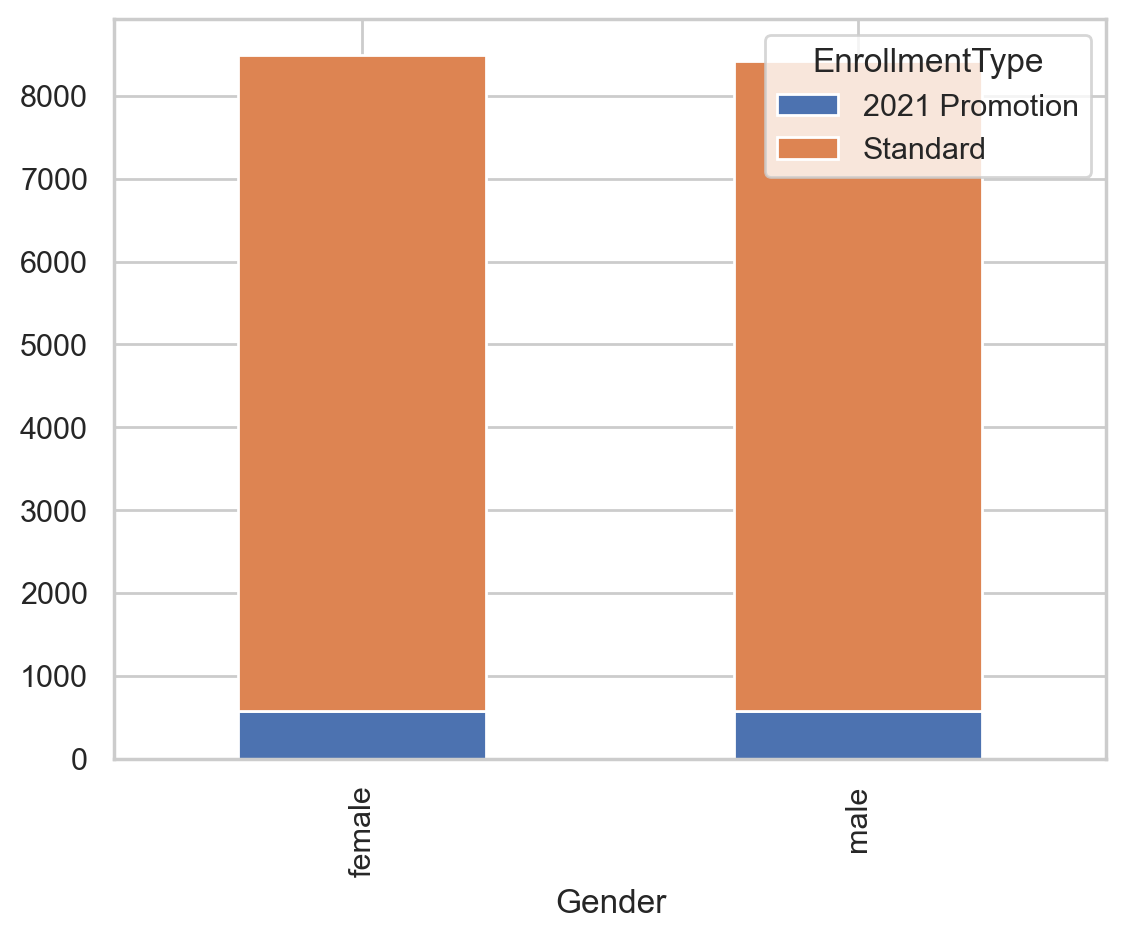

In [21]:
cat1 = 'EnrollmentType'
cat2 = 'Gender'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Education'>

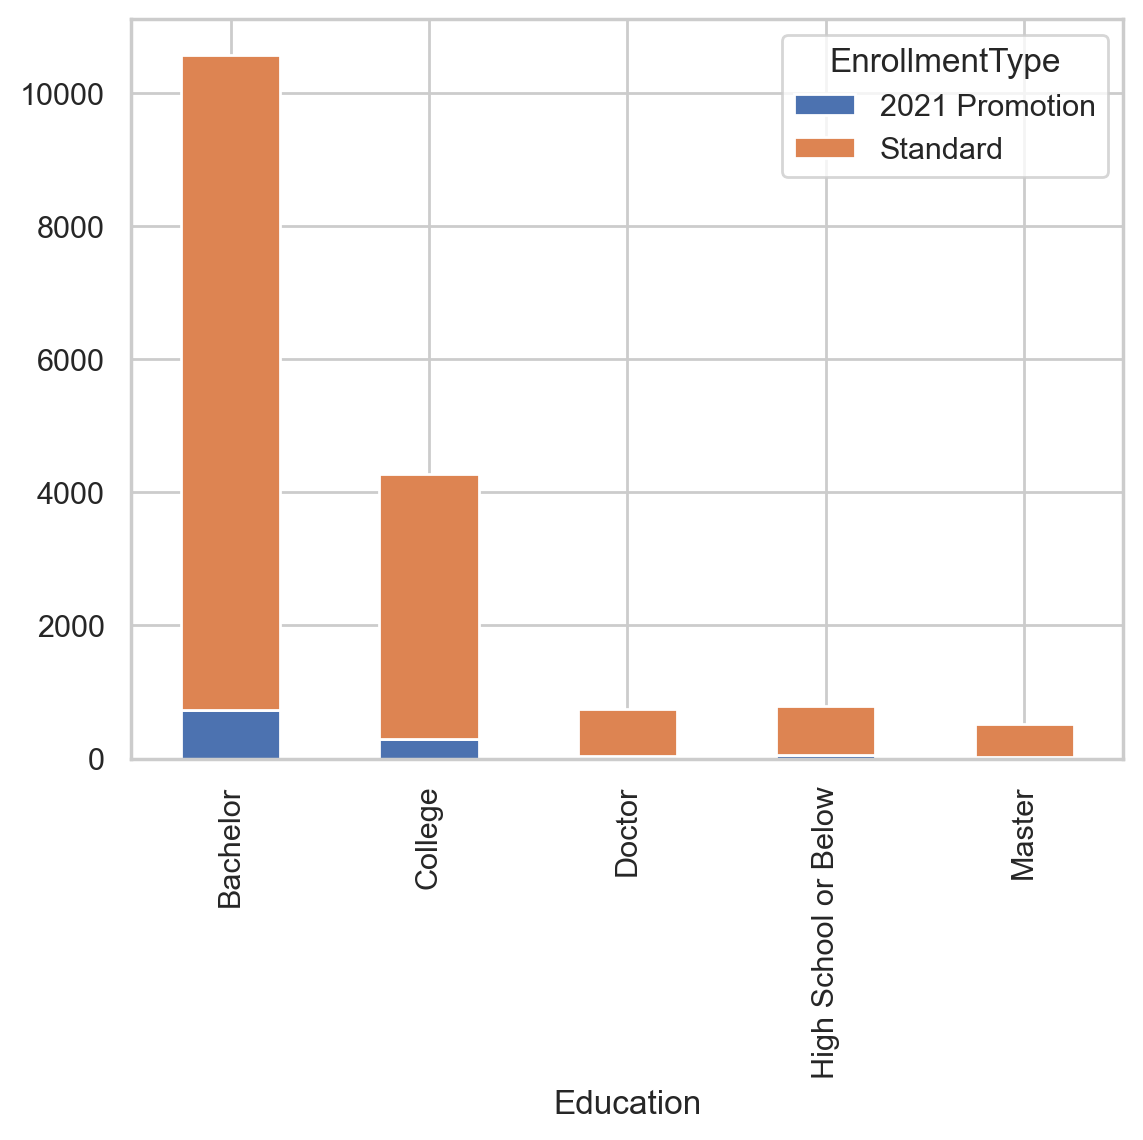

In [22]:
cat1 = 'EnrollmentType'
cat2 = 'Education'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='Marital Status'>

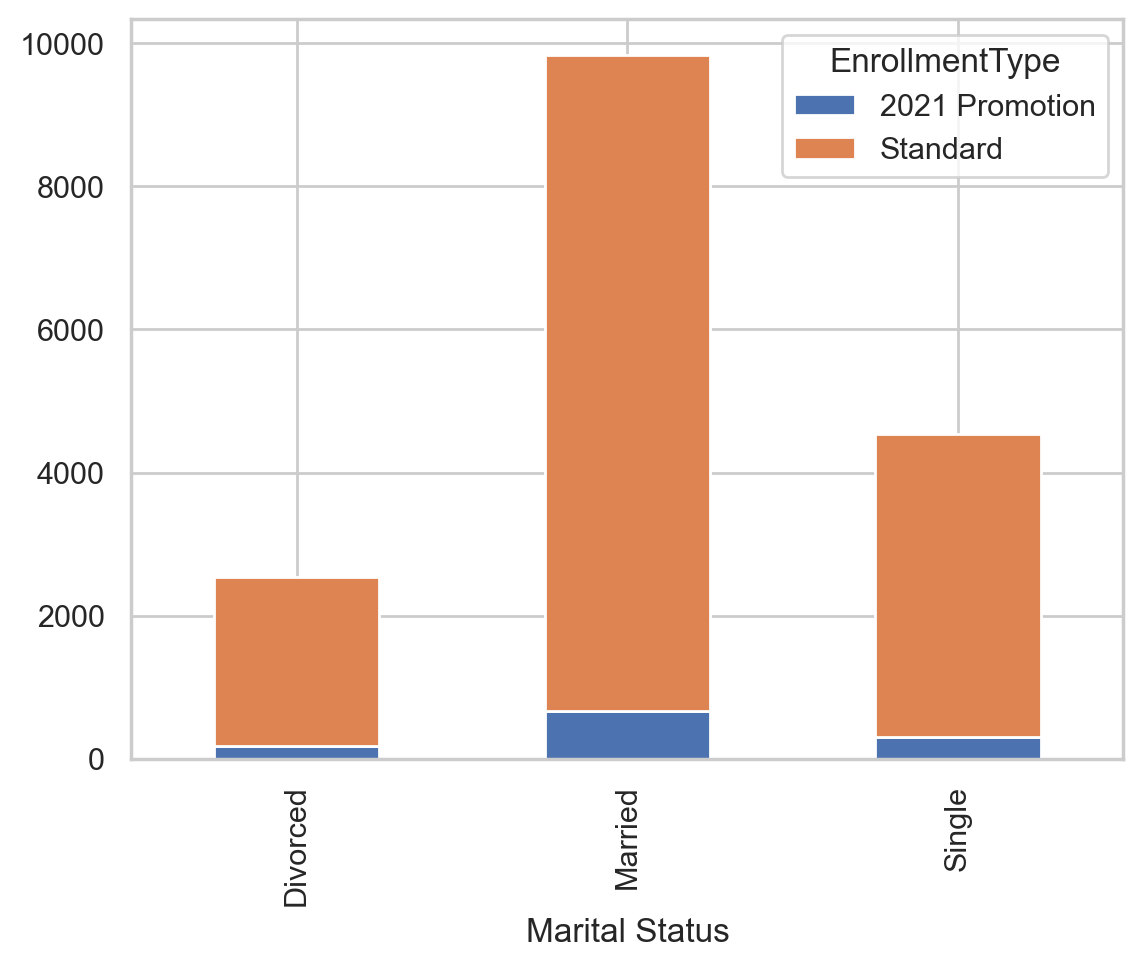

In [23]:
cat1 = 'EnrollmentType'
cat2 = 'Marital Status'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

<Axes: xlabel='LoyaltyStatus'>

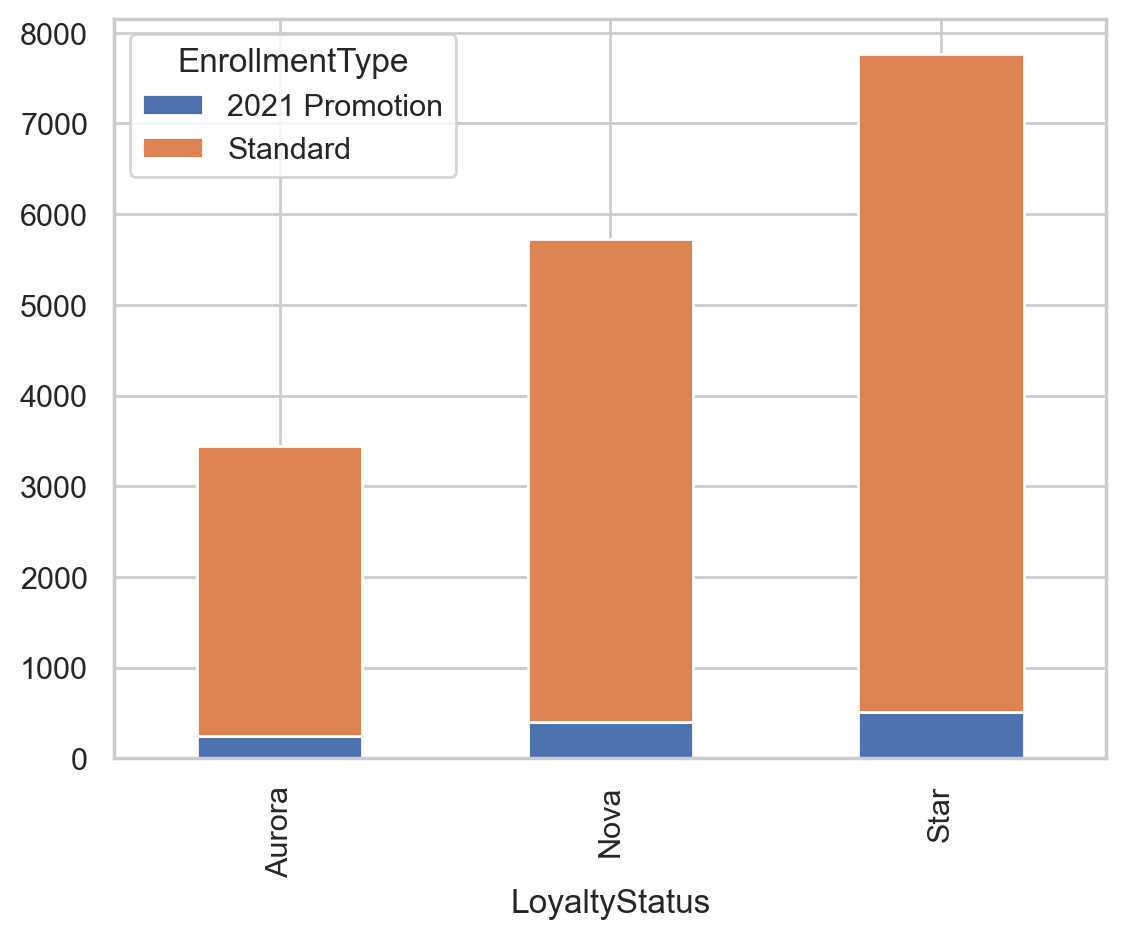

In [24]:
cat1 = 'EnrollmentType'
cat2 = 'LoyaltyStatus'

catpc_df = df_customer.groupby([cat2, cat1])[cat1].size().unstack()

catpc_df.plot.bar(stacked=True)

## NaN's

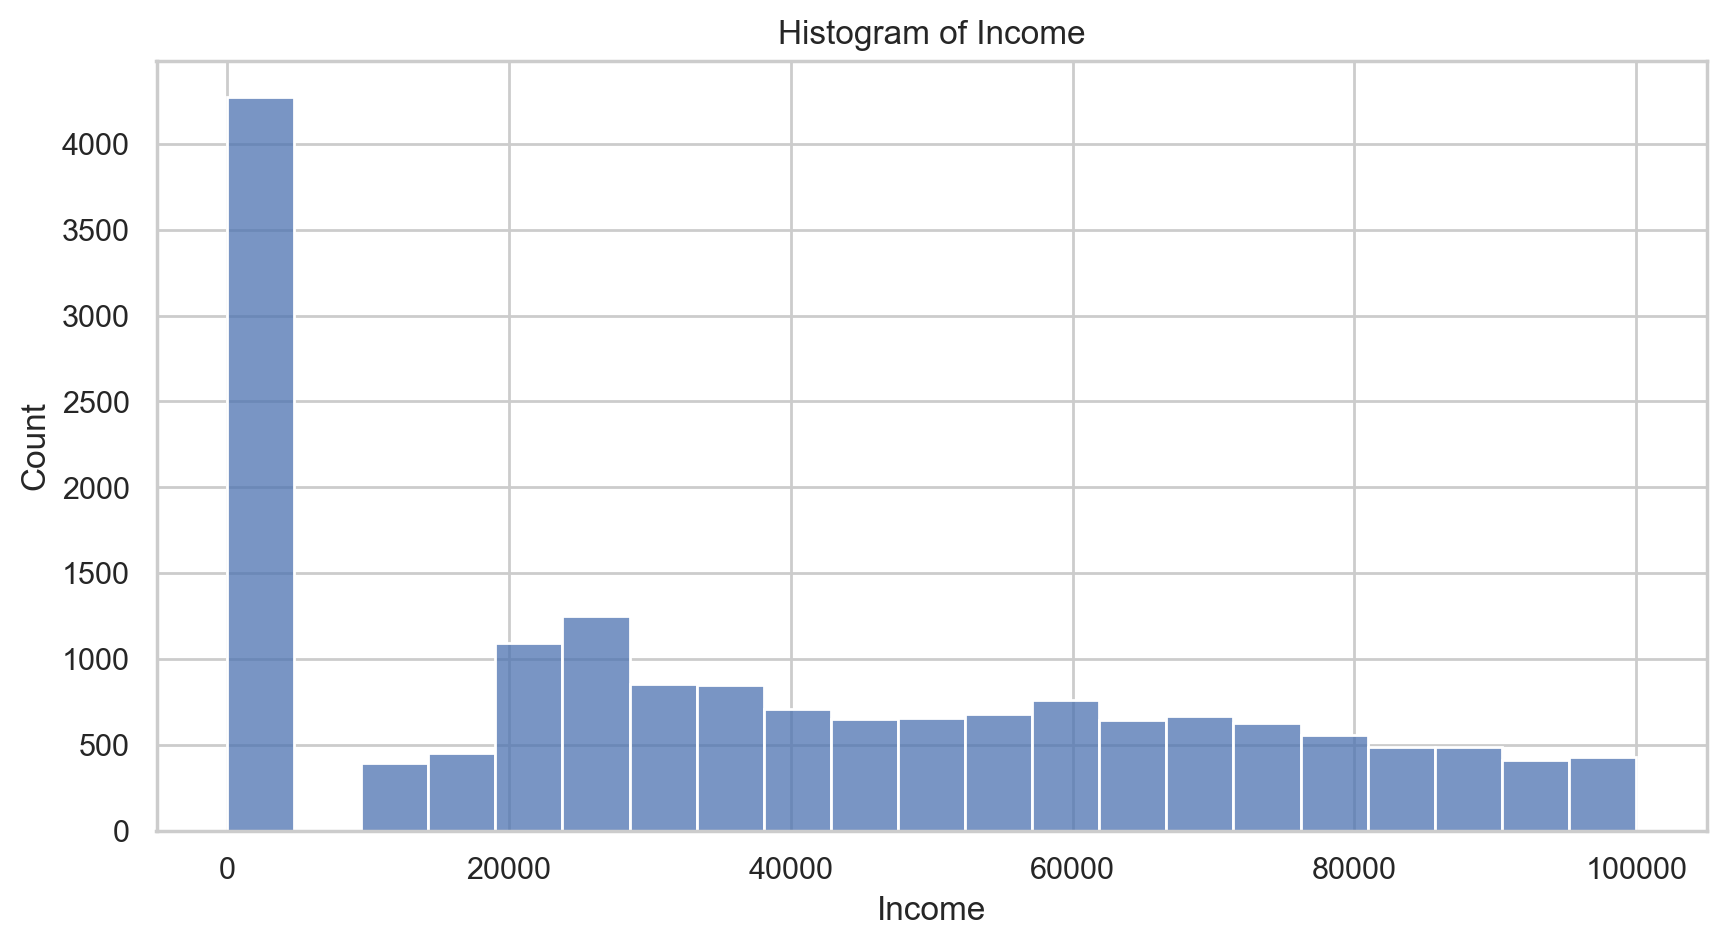

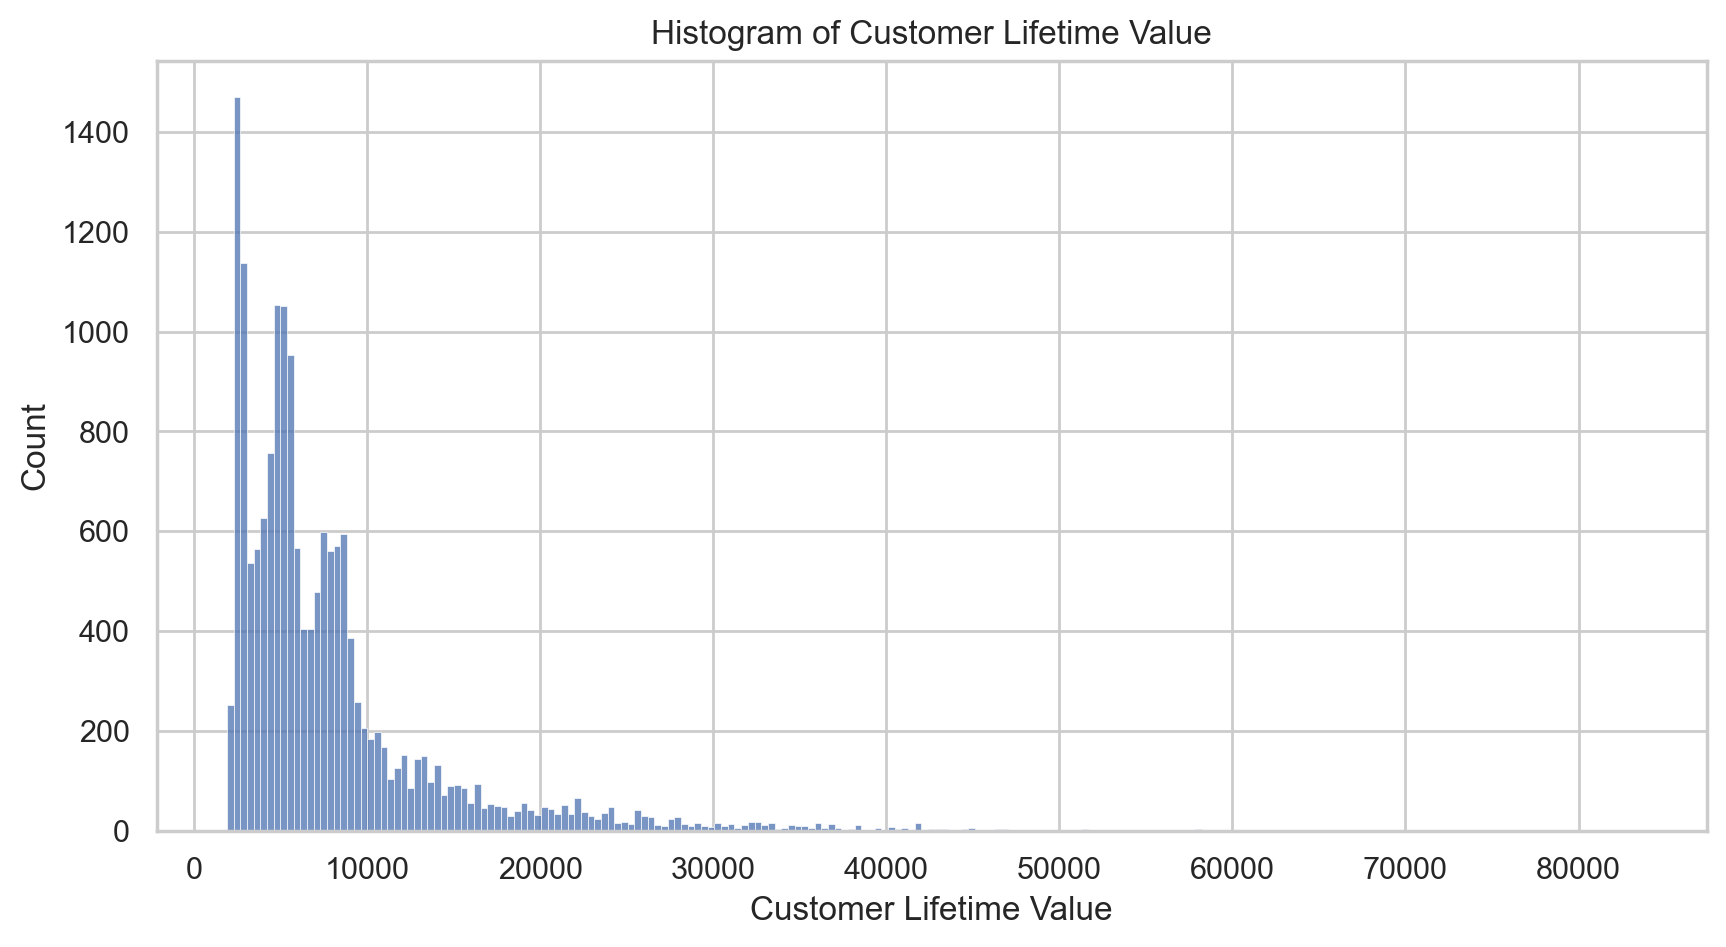

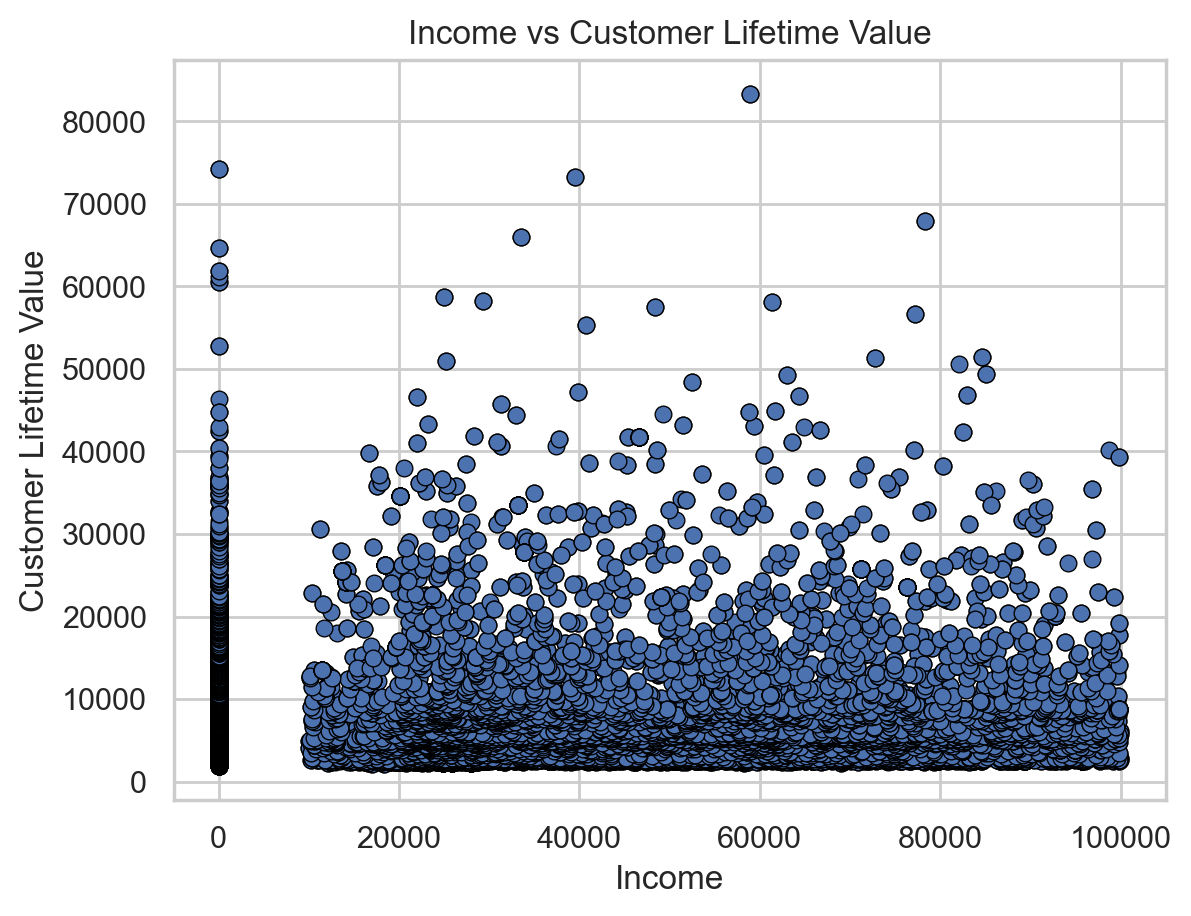

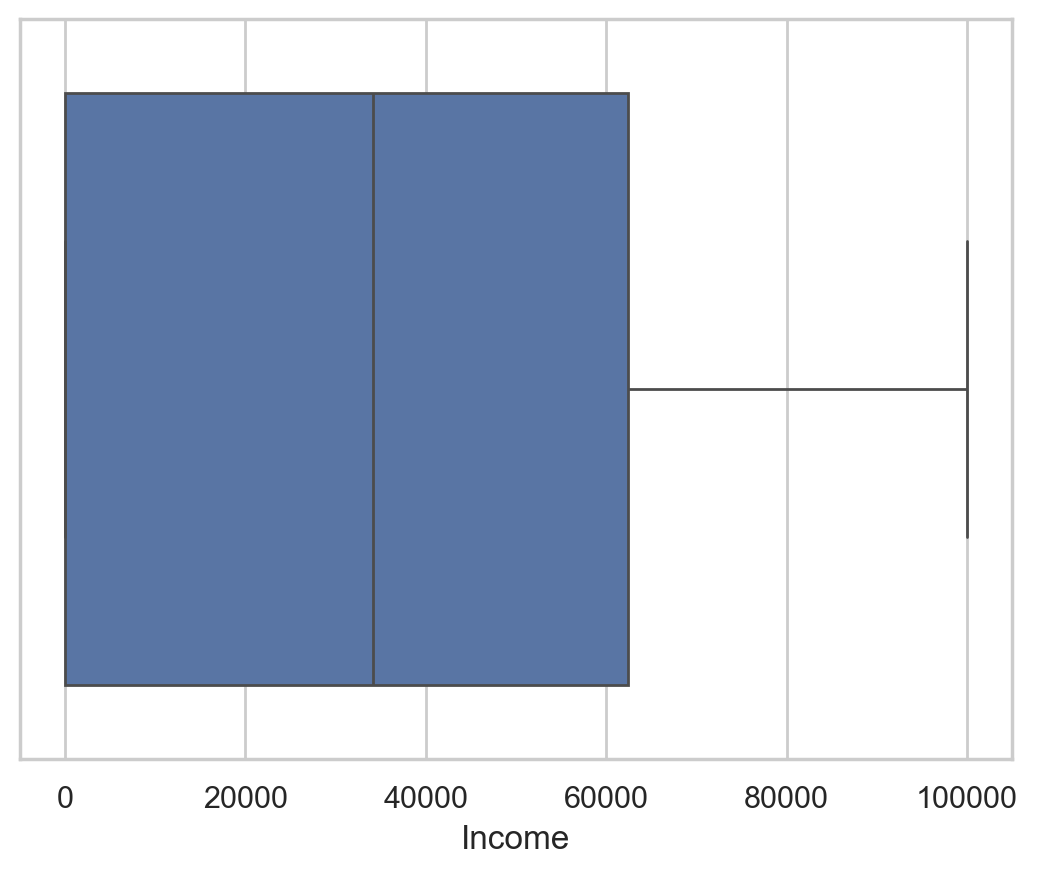

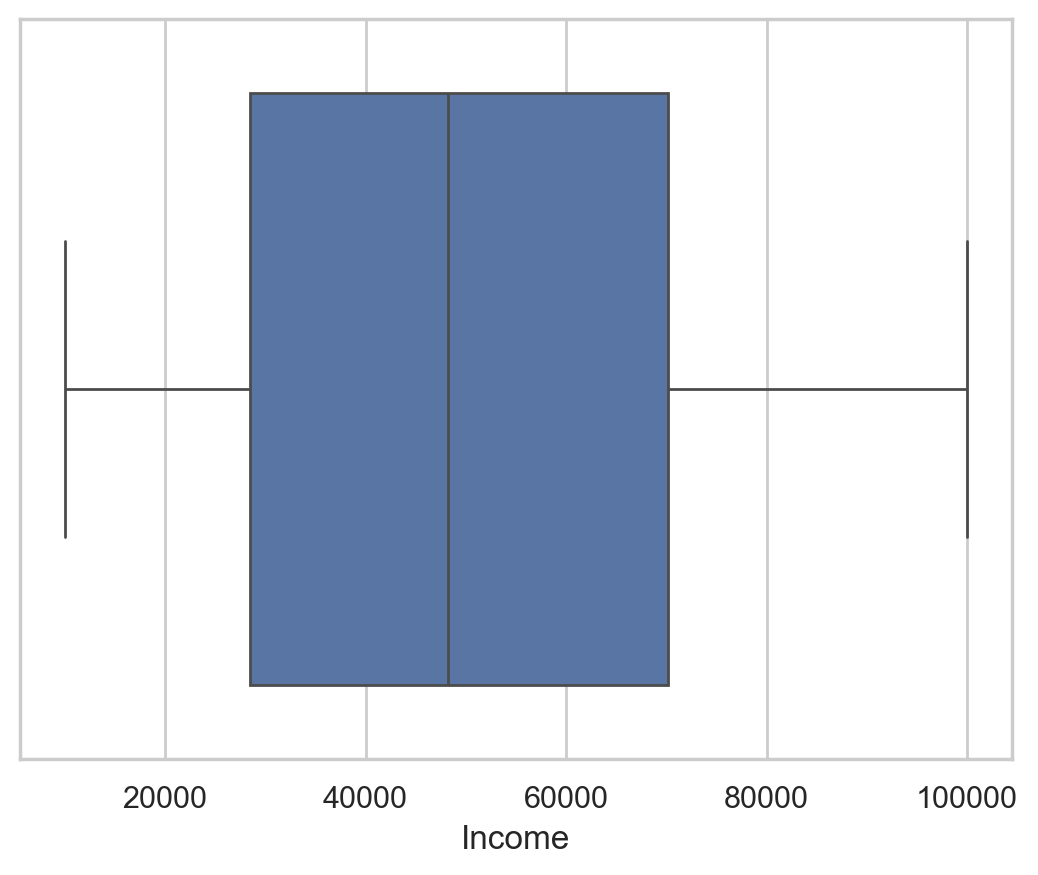

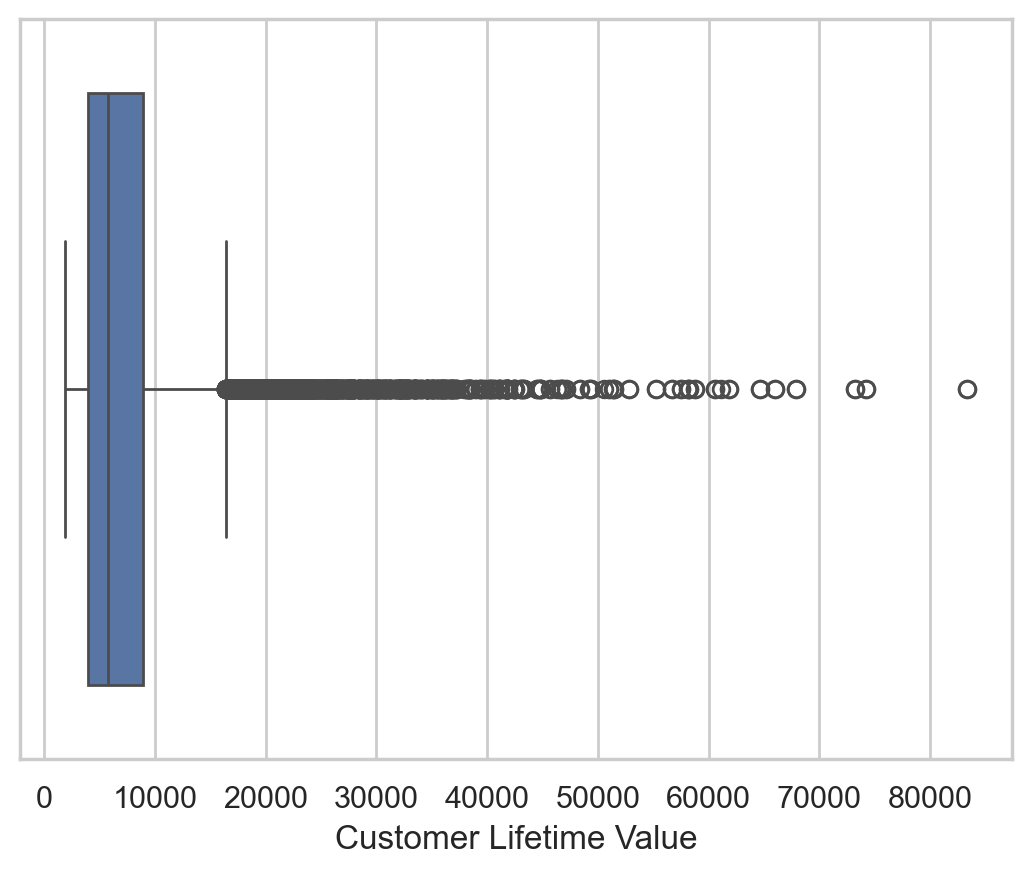

In [25]:
numeric_features = ['Income', 'Customer Lifetime Value']
for i in numeric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(x=df_customer[i])
    plt.title(f'Histogram of {i}')
    plt.show()

sns.scatterplot(data=df_customer, x='Income', y='Customer Lifetime Value', edgecolor='black')
plt.title('Income vs Customer Lifetime Value')
plt.show()
sns.boxplot(x = df_customer['Income'])
plt.show()
sns.boxplot(x = df_customer[df_customer['Income']> 0]['Income'])
plt.show()
sns.boxplot(x = df_customer['Customer Lifetime Value'])
plt.show()

In [26]:
df_customer[(df_customer['Income'] == 0) & (df_customer['Education'] == "College")]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
6,6,927943,Hue,Sellner,Hue Sellner,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,College,Urban,0.0,Single,Star,6/9/2017,NaN,3857.95,Standard
13,13,988178,Andre,Cotugno,Andre Cotugno,Canada,Quebec,Montreal,45.501690,-73.567253,...,male,College,Rural,0.0,Single,Star,10/13/2016,NaN,3871.07,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16885,632951,Devorah,Litzau,Devorah Litzau,Canada,Alberta,Edmonton,53.544388,-113.490930,...,female,College,Rural,0.0,Married,Star,7/10/2021,NaN,44771.30,Standard
16891,16891,546773,Danyel,Arquitt,Danyel Arquitt,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Suburban,0.0,Married,Star,9/6/2018,NaN,52811.49,Standard
16895,16895,900501,Genevieve,Sayyed,Genevieve Sayyed,Canada,Ontario,Sudbury,46.522099,-80.953033,...,male,College,Rural,0.0,Single,Star,9/17/2015,NaN,61134.68,Standard
16896,16896,823768,Mandy,Sammarco,Mandy Sammarco,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,female,College,Rural,0.0,Married,Star,12/22/2015,NaN,61850.19,Standard


In [27]:
import pandas as pd

# Create a new categorical flag
df_customer['Income_Class'] = df_customer['Income'].apply(
    lambda x: 'Zero Income' if x == 0 else 'Non-Zero Income'
)

# Quick check
df_customer['Income_Class'].value_counts()


Income_Class
Non-Zero Income    12648
Zero Income         4273
Name: count, dtype: int64

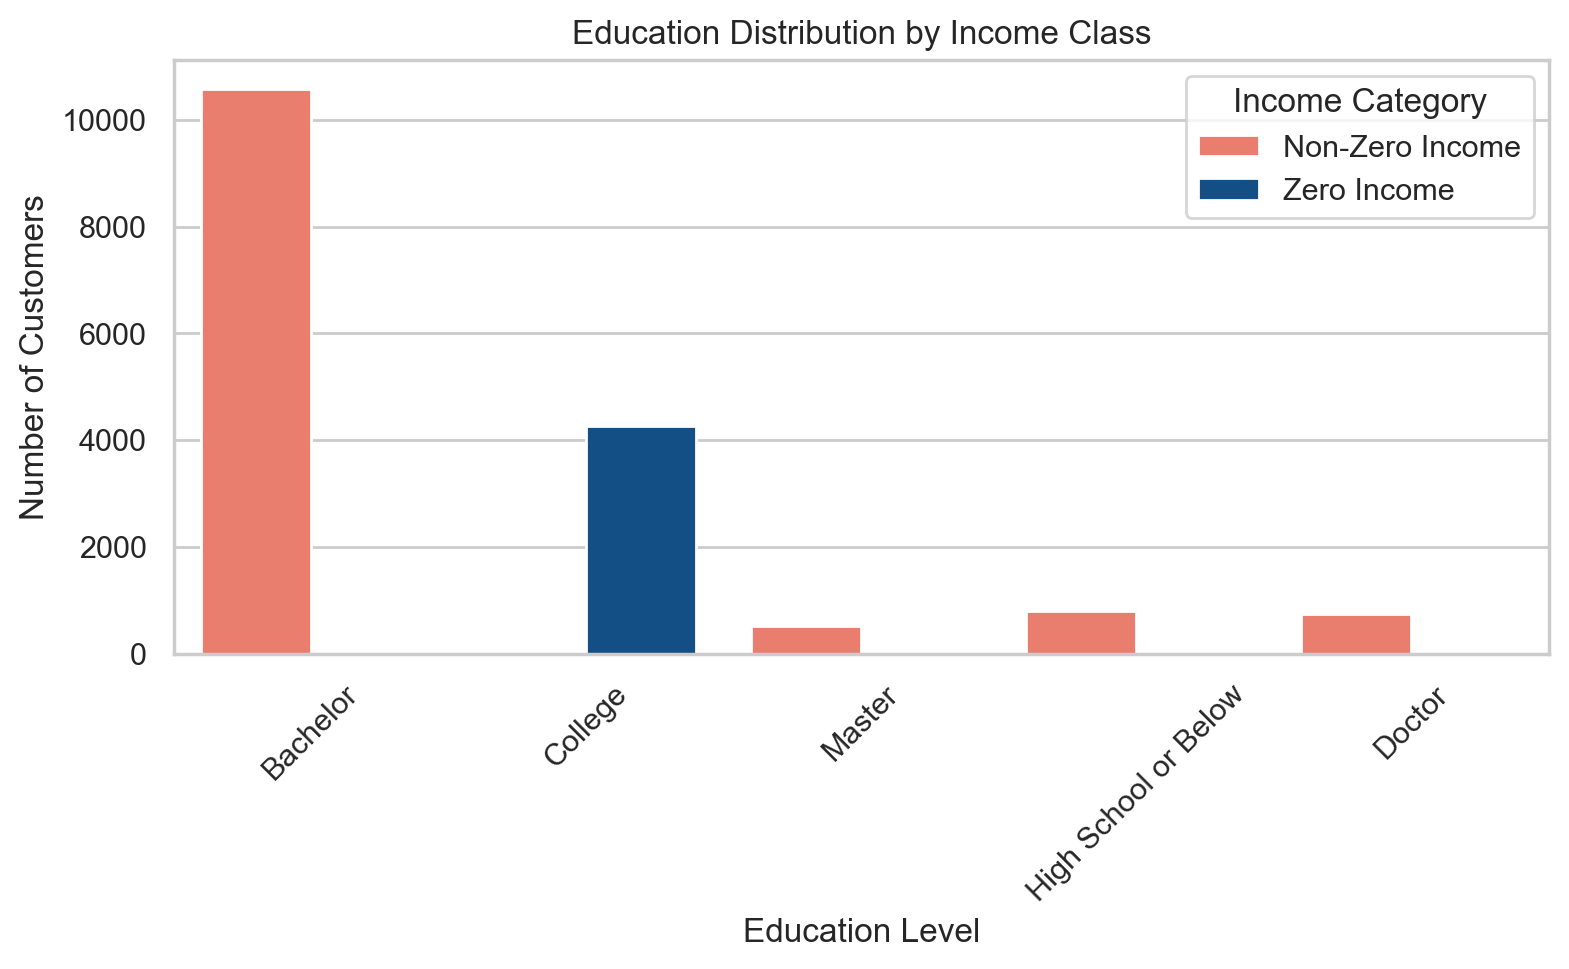

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(
    data=df_customer,
    x='Education',
    hue='Income_Class',
    palette=['#FF6F59', '#004E98']  # contrasting palette
)
plt.title('Education Distribution by Income Class')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
df_customer["Province or State"].nunique()

11

In [30]:
df_customer["EnrollmentDateOpening"] = pd.to_datetime(df_customer["EnrollmentDateOpening"])
df_customer["CancellationDate"] = pd.to_datetime(df_customer["CancellationDate"], errors='coerce')


In [31]:
#df_customer['CustomerTenure'] = (df_customer['CancellationDate'].fillna() - df_customer['EnrollmentDateOpening'])
#df_customer

#fazer histograma com as customr tenure
# % de clientes ativos vs cancelados
# dar drop nem que seja masi à frente mas indicar no relatorio dos clientes que tem o mesmo loyalty number mas nomes diferentes
# indicar possiveis colunas a descartar, na minha opiniao as 3 dos nomes, Country e passar o loyalty number para index porque ja é unico.
# provavelmente remover os nans do income e do customer lifetime value

In [36]:
import plotly.express as px

fig = px.scatter_geo(
    df_customer,
    lat='Latitude',
    lon='Longitude',
    color='Customer Lifetime Value',
    hover_name='City',
    hover_data=['Province or State', 'Income', 'LoyaltyStatus'],
    projection='natural earth',
    color_continuous_scale='viridis',
    title='Customer Distribution Across Canada',
    scope='north america'  # foca a vista na América do Norte
)
fig.update_geos(
    center=dict(lat=(115 / 2), lon=(-190/2)),  # coordenadas médias do Canadá
    lataxis_range=[40, 75],                   # latitude range (ajustável)
    lonaxis_range=[-140, -50],                # longitude range (ajustável)
    showcountries=True, countrycolor="LightGray",
    showland=True, landcolor="whitesmoke",
    lakecolor="LightBlue",
    showocean=True, oceancolor="aliceblue"
)
fig.show()
